In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Practice 1

In [2]:
data_url = "https://raw.githubusercontent.com/environmental-data-science" \
            "/eds217_2023/main/data/BSRN_GOB_2019-10.csv"

bsrn = pd.read_csv(data_url)

# Practice 2
a. Print a list of your DataFrame's column names

In [3]:
print(list(bsrn.columns))

['DATE', 'H_m', 'SWD_Wm2', 'STD_SWD', 'DIR_Wm2', 'STD_DIR', 'DIF_Wm2', 'STD_DIF', 'LWD_Wm2', 'STD_LWD', 'SWU_Wm2', 'LWU_Wm2', 'T_degC', 'RH', 'P_hPa']


b. How many values are there in the entire DataFrame?

In [4]:
bsrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     44640 non-null  object 
 1   H_m      44640 non-null  int64  
 2   SWD_Wm2  44630 non-null  float64
 3   STD_SWD  44637 non-null  float64
 4   DIR_Wm2  44623 non-null  float64
 5   STD_DIR  44623 non-null  float64
 6   DIF_Wm2  44632 non-null  float64
 7   STD_DIF  44632 non-null  float64
 8   LWD_Wm2  44589 non-null  float64
 9   STD_LWD  44637 non-null  float64
 10  SWU_Wm2  44640 non-null  int64  
 11  LWU_Wm2  44640 non-null  int64  
 12  T_degC   44640 non-null  float64
 13  RH       44640 non-null  float64
 14  P_hPa    44640 non-null  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 5.1+ MB


c. What is the data type of the first column?

In [5]:
bsrn[['DATE']].dtypes

DATE    object
dtype: object

In [6]:
type(bsrn.iloc[:,0])

pandas.core.series.Series

# Practice 3
a. Create a new DataFrame containing the first record for each day and the following columns: the timestamp of the record, incoming shortwave radiation, direct and diffuse radiation, and incoming longwave radiation. (Hint: the BSRN station collects data every minute).

In [7]:
# 1440 minutes in a day
bsrn_practice_3 = bsrn.loc[::1440][
    ['DATE', 'SWD_Wm2', 'DIR_Wm2', 'DIF_Wm2','LWD_Wm2']
]

b. Create a new Series containing the temperature values every hour at the top of the hour.

In [8]:
temp_every_hour = pd.Series(bsrn.loc[::60, 'T_degC'])

type(temp_every_hour)

pandas.core.series.Series

c. Convert the DATE column to datetime using the pd.to_datetime() function.

In [9]:
bsrn_practice_3['DATE'] = pd.to_datetime(bsrn_practice_3['DATE'])

In [10]:
bsrn_practice_3.info() # checking that it was converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 43200
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     31 non-null     datetime64[ns]
 1   SWD_Wm2  31 non-null     float64       
 2   DIR_Wm2  31 non-null     float64       
 3   DIF_Wm2  31 non-null     float64       
 4   LWD_Wm2  31 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.3 KB


d. Set the DATE column as the index of the DataFrame using the set_index() method.

In [11]:
bsrn_practice_3.set_index('DATE', inplace = True)

In [12]:
bsrn_practice_3.head()

,SWD_Wm2,DIR_Wm2,DIF_Wm2,LWD_Wm2
DATE,,,,
2019-10-01,-3.0,0.0,-3.0,300.0
2019-10-02,-2.0,0.0,-2.0,306.0
2019-10-03,-2.0,0.0,-2.0,293.0
2019-10-04,-3.0,0.0,-3.0,287.0
2019-10-05,-2.0,0.0,-2.0,305.0


# Practice 4
Calculate the mean incoming shortwave, outgoing shortwave, incoming longwave, and outgoing longwace radiation over the entire month

In [13]:
cols = ['SWD_Wm2', 'SWU_Wm2', 'LWD_Wm2', 'LWU_Wm2']

bsrn[cols].mean()

SWD_Wm2    318.046516
SWU_Wm2    110.445004
LWD_Wm2    342.350692
LWU_Wm2    455.054032
dtype: float64

# Practice 5
a. Add a column ‘NET_SW’ to bsrn with the net shortwave radiation.

In [14]:
bsrn['NET_SW'] = bsrn['SWD_Wm2'] - bsrn['SWU_Wm2'] # incoming - outgoing
bsrn.tail()

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,NET_SW
44635,2019-10-31 23:55:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.6,964,-2.0
44636,2019-10-31 23:56:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.1,35.5,964,-2.0
44637,2019-10-31 23:57:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.3,964,-2.0
44638,2019-10-31 23:58:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.2,0,423,23.0,35.2,964,-2.0
44639,2019-10-31 23:59:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.1,0,423,23.1,35.0,964,-2.0


b. Add a column ‘NET_LW’ to bsrn with the net longwave radiation.

In [15]:
bsrn['NET_LW'] = bsrn['LWD_Wm2'] - bsrn['LWU_Wm2']

c. Add a column ‘NET_RAD’ to bsrn with the net total radiation.

In [16]:
bsrn['NET_RAD'] = bsrn['NET_SW'] + bsrn['NET_LW']

bsrn.head(10)

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,NET_SW,NET_LW,NET_RAD
0,2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966,-3.0,-83.0,-86.0
1,2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966,-3.0,-83.0,-86.0
2,2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966,-3.0,-83.0,-86.0
3,2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966,-3.0,-83.0,-86.0
4,2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966,-3.0,-83.0,-86.0
5,2019-10-01 00:05:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.2,0,383,16.9,30.5,966,-2.0,-83.0,-85.0
6,2019-10-01 00:06:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.2,0,383,16.8,30.4,966,-2.0,-83.0,-85.0
7,2019-10-01 00:07:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.1,0,384,17.0,31.0,966,-2.0,-84.0,-86.0
8,2019-10-01 00:08:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.2,0,384,16.7,30.6,966,-2.0,-84.0,-86.0
9,2019-10-01 00:09:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,301.0,0.3,0,384,17.1,30.6,966,-2.0,-83.0,-85.0


d. Create a new DataFrame with the day of the month and daily mean values of shortwave incoming, shortwave outgoing, longwave incoming, longwave outgoing radiation, and net total radiation. (Hint: use masking!).

In [28]:
bsrn['DATE'] = pd.to_datetime(bsrn['DATE'])
bsrn.set_index('DATE', inplace = True)

In [29]:

daily_rad = []
for d in bsrn.index.day.unique():
    avg_SWD = bsrn.SWD_Wm2[bsrn.index.day == d].mean()
    avg_SWU = bsrn.SWU_Wm2[bsrn.index.day == d].mean()
    avg_LWD = bsrn.LWD_Wm2[bsrn.index.day == d].mean()
    avg_LWU = bsrn.LWU_Wm2[bsrn.index.day == d].mean()
    avg_NET = bsrn.NET_RAD[bsrn.index.day == d].mean()
    # Append the current day and these values to our list of daily radiation values:
    daily_rad.append([d, avg_SWD, avg_SWU, avg_LWD, avg_LWU, avg_NET])

daily_radiation = pd.DataFrame(daily_rad, columns=['day', 'SW_in', 'SW_out', 'LW_in', 'LW_out', 'NET'])

In [30]:
daily_radiation.head()

,day,SW_in,SW_out,LW_in,LW_out,NET
0,1,325.336345,115.334028,321.219903,458.834028,72.366295
1,2,322.732453,113.939583,318.131341,448.486111,78.402643
2,3,298.635417,103.261806,330.516667,429.979861,95.910417
3,4,323.209173,113.222222,314.129526,439.990972,83.788153
4,5,296.861806,105.461806,324.660876,427.359722,88.569840


# Practice 6
a. use a list of lists to construct a DataFrame named df1 containing the data in the table below

In [22]:
df1 = pd.DataFrame([['Amazon', 6400, 7050000], 
                    ['Congo', 4371, 4014500],
                    ['Yangtze', 6418, 1808500],
                    ['Mississippi', 3730, 3202230]],
                    columns = ['River', 'Length (km)', 'Drainage area (km^2)'])

df1.head()

,River,Length (km),Drainage area (km^2)
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississippi,3730,3202230


b. Use a dict to construct a DataFrame named df2 containing the data in the table below.

In [23]:
df2 = pd.DataFrame({'River': ['Zambezi', 'Mekong', 'Murray', 'Rhone', 'Cubango'],
                    'Length (km)': [2574, 4023, 2508, 813, 1056],
                    'Drainage area (km^2)': [1331000, 811000, 1061469, 98000, 530000]})

df2

,River,Length (km),Drainage area (km^2)
0,Zambezi,2574,1331000
1,Mekong,4023,811000
2,Murray,2508,1061469
3,Rhone,813,98000
4,Cubango,1056,530000


c. Concatenate df1 and df2 into a new DataFrame with all 9 rivers.

In [24]:
all_rivers = pd.concat([df1, df2], ignore_index=True)
all_rivers

,River,Length (km),Drainage area (km^2)
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississippi,3730,3202230
4,Zambezi,2574,1331000
5,Mekong,4023,811000
6,Murray,2508,1061469
7,Rhone,813,98000
8,Cubango,1056,530000


d. Create a new DataFrame rivers with the discharge, mouth, source, and continent information and add this to your DataFrame from (a) to produce a DataFrame with all of the data in the table below.

In [25]:
rivers = pd.DataFrame({'Discharge (m^2/s)':[209000,41200,30166,16792,3400,16000,767,1710,475],
                       'Mouth': ['Atlantic Ocean', 'Atlantic Ocean', 'East China Sea', 'Gulf of Mexico', 'Indian Ocean', 'South China Sea', 'Southern Ocean', 'Mediterranean Sea', 'Okavango Delta'],
                      'Source': ['Rio Mantaro', 'Lualaba River', 'Jianggendiru Glacier', 'Lake Itasca', 'Miomo Woodlands', 'Lasagongma Spring', 'Australian Alps', 'Rhone Glacier', 'Bie Plateau'],
                      'Continent': ['South America', 'Africa', 'Asia', 'North America', 'Africa', 'Asia', 'Oceania', 'Europe', 'Africa']})

In [31]:
complete_rivers = pd.concat([all_rivers, rivers], axis=1) # concatenate everything together, by rows

complete_rivers

,River,Length (km),Drainage area (km^2),Discharge (m^2/s),Mouth,Source,Continent
0,Amazon,6400,7050000,209000,Atlantic Ocean,Rio Mantaro,South America
1,Congo,4371,4014500,41200,Atlantic Ocean,Lualaba River,Africa
2,Yangtze,6418,1808500,30166,East China Sea,Jianggendiru Glacier,Asia
3,Mississippi,3730,3202230,16792,Gulf of Mexico,Lake Itasca,North America
4,Zambezi,2574,1331000,3400,Indian Ocean,Miomo Woodlands,Africa
5,Mekong,4023,811000,16000,South China Sea,Lasagongma Spring,Asia
6,Murray,2508,1061469,767,Southern Ocean,Australian Alps,Oceania
7,Rhone,813,98000,1710,Mediterranean Sea,Rhone Glacier,Europe
8,Cubango,1056,530000,475,Okavango Delta,Bie Plateau,Africa


# Practice 7
Use the plt module to create a visualization of your radiation data and/or the rivers data. There are examples of plotting functions from our prior exercises. Also, don’t be afraid to experiment or try using GitHub CoPilot or ChatGPT to generate some intial code.

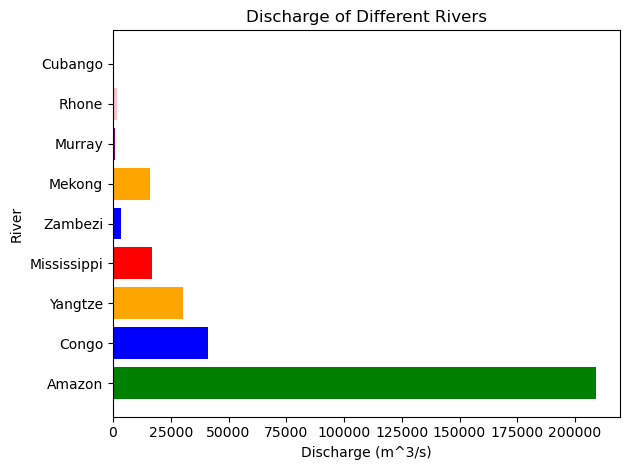

In [59]:
color_map = {
    'Africa': 'blue',
    'South America': 'green',
    'North America': 'red',
    'Oceania': 'purple',
    'Asia': 'orange',
    'Europe': 'pink'
}

complete_rivers['Color'] = complete_rivers['Continent'].map(color_map)

plt.barh(complete_rivers['River'], complete_rivers['Discharge (m^2/s)'], color=complete_rivers['Color'].tolist())

# Adding title and labels
plt.title('Discharge of Different Rivers')
plt.xlabel('Discharge (m^3/s)')
plt.ylabel('River')

# Custom legend for continents
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=color_map[key], lw=4) for key in color_map]
ax.legend(custom_lines, color_map.keys())

# Displaying the plot
plt.tight_layout()
plt.show()

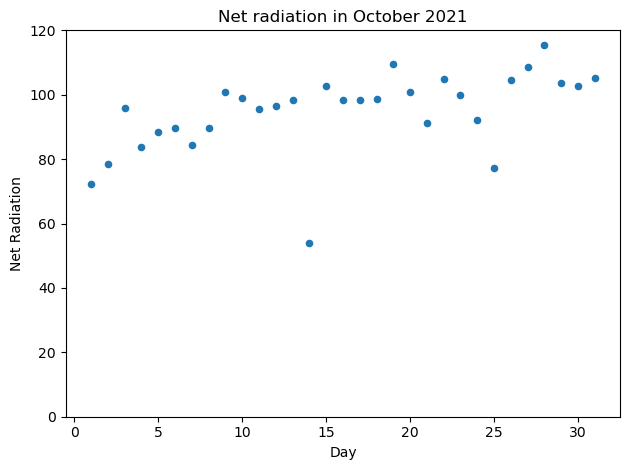

In [46]:
daily_radiation.plot(kind='scatter', x='day', y='NET',
                     ylim=(0, 120))

# Adding title and labels
plt.title('Net radiation in October 2021')
plt.xlabel('Day')
plt.ylabel('Net Radiation')

# Displaying the plot
plt.tight_layout()
plt.show()

# Practice 8
a. Export your rivers DataFrame to a CSV file in your repository’s data folder.



In [40]:
complete_rivers.to_csv('../data/rivers.csv', index=False)

b. Export your bsrn DataFrame to a CSV file in your repository’s data folder.

In [42]:
bsrn.to_csv('../data/bsrn.csv', index=False)